In [2]:
# Import all necessary libraries

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0, DenseNet121, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set random seeds 
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

plt.style.use('ggplot')
%matplotlib inline

# Define paths
DATA_DIR = './data/ISIC2018_Task3_Training_Input'
CSV_FILE = './data/ISIC2018_Task3_Training_GroundTruth.csv'
MODEL_SAVE_PATH = './models/skin_lesion_model.keras'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create directories
os.makedirs('./models', exist_ok=True)
os.makedirs('./plots', exist_ok=True)

In [8]:
# Load and explore the data

In [10]:
def load_isic_data(data_dir, csv_file):
    """Load ISIC dataset and return image paths and labels"""
    df = pd.read_csv(csv_file)
    image_paths = [os.path.join(data_dir, f"{img_id}.jpg") for img_id in df['image']]
    labels_one_hot = df.iloc[:, 1:].values
    labels = labels_one_hot.argmax(axis=1)
    class_names = df.columns[1:].tolist()
    label_names = [class_names[i] for i in labels]
    return image_paths, labels, label_names, class_names

# Load the data
image_paths, labels, label_names, class_names = load_isic_data(DATA_DIR, CSV_FILE)
print(f'Classes: {class_names}')
print(f'Total images: {len(image_paths)}')

Classes: ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
Total images: 10015


In [12]:
# Plot class distribution

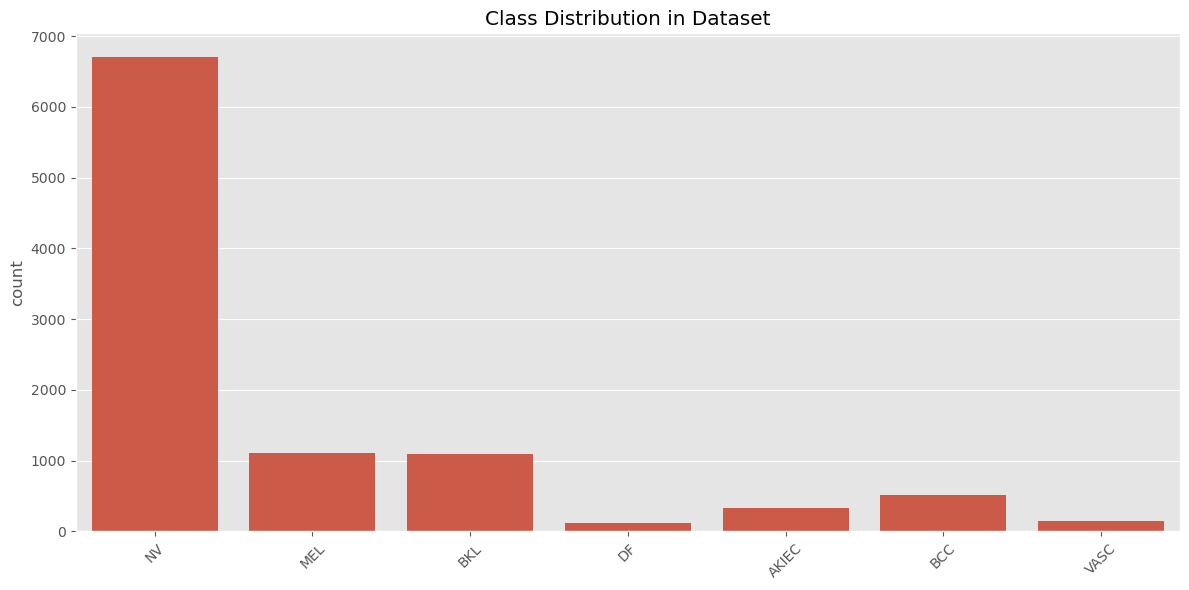

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x=label_names)
plt.xticks(rotation=45)
plt.title('Class Distribution in Dataset')
plt.tight_layout()
plt.savefig('./plots/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()